In [1]:
import os
import pandas as pd
from autoemulate.core.compare import AutoEmulate
import torch
figsize = (9, 5)

import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
param_filename = 'parameters_naghavi_constrained_fixed_T_v_tot_v_ref_lower_k_pas_further'

In [3]:
# Load the combined sobol df
combined_sobol_df = pd.read_csv(os.path.join('../../outputs/sa_results/aggregated_dfs/',
                                             param_filename,
                                             'combined_sobol_df.csv'))

In [4]:
data_type = 'simulations'

sims_df = combined_sobol_df[combined_sobol_df['data_type'] == data_type]

Plotting for  p_ao_min


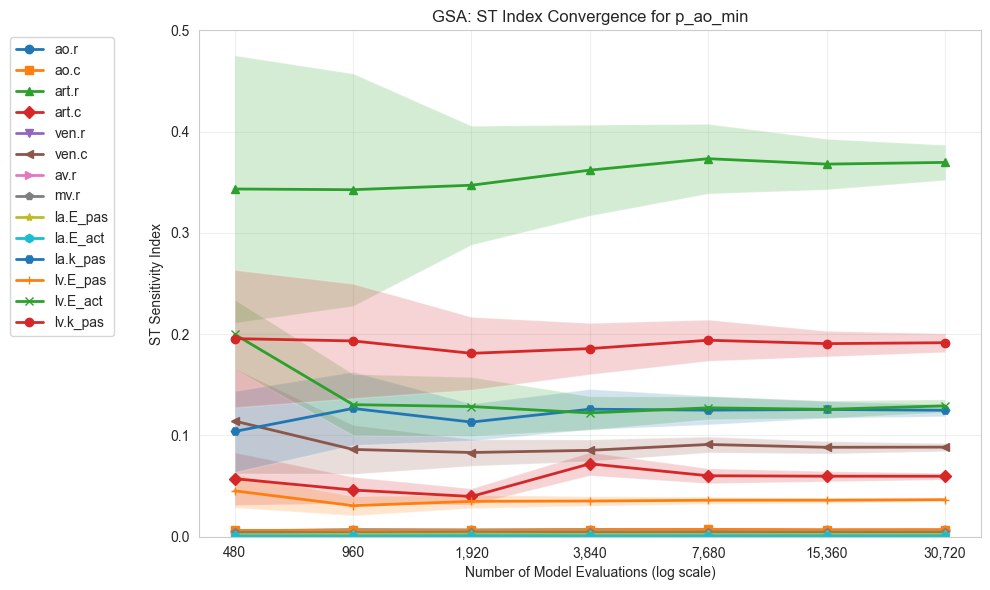

Plotting for  p_ao_max


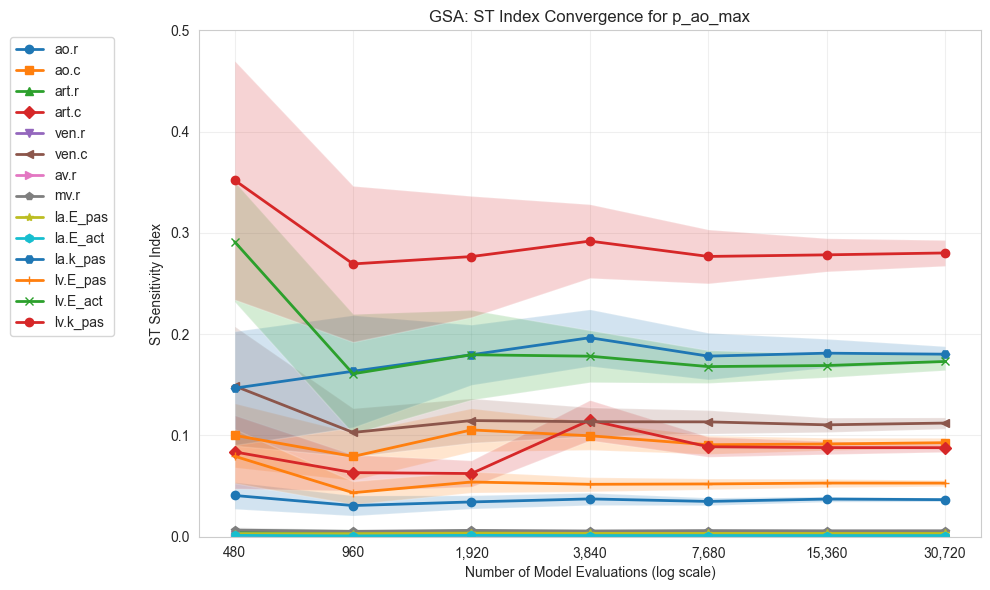

Plotting for  p_ao_mean


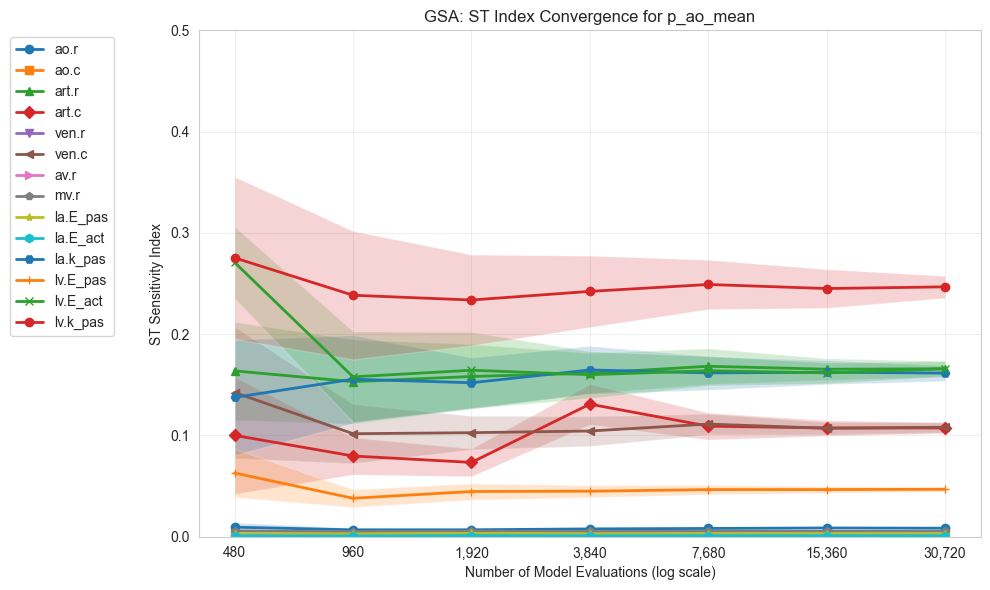

In [6]:
index_to_plot = 'ST'

# Set style once outside the loop
sns.set_style("whitegrid")

# Plot the ST convergence for simulations
df = sims_df[sims_df['index'] == index_to_plot]

output_to_plot = ['p_ao_min',
                  'p_ao_max', 
                  'p_ao_mean']

# Define different markers for each parameter
markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x']

for i_feature in output_to_plot:

    print('Plotting for ', i_feature)

    i_df = df[df['output'] == i_feature]

    plt.figure(figsize=(10, 6))
    
    # Get unique parameters for plotting
    parameters = i_df['parameter'].unique()
    
    for i, param in enumerate(parameters):
        param_data = i_df[i_df['parameter'] == param].sort_values('n_model_evals')

        x = param_data['n_model_evals']
        y = param_data['value']
        ci = param_data['confidence']
        
        # Calculate confidence bounds
        y_lower = y - ci/2
        y_upper = y + ci/2
        
        # Plot the line with different markers
        marker = markers[i % len(markers)]  # Cycle through markers if more parameters than markers
        plt.plot(x, y, marker=marker, label=param, linewidth=2, markersize=6)
        
        # Add confidence interval shading
        plt.fill_between(x, y_lower, y_upper, alpha=0.2)

    # Use log scale for x-axis
    plt.xscale('log', base=2)

    # Set y axis scale manually
    if index_to_plot == 'S1':
        plt.ylim(-0.2, 0.6)
    elif index_to_plot == 'ST':
        plt.ylim(0, 0.5)

    # Set x-axis ticks to actual n_model_evals values
    unique_x_vals = sorted(i_df['n_model_evals'].unique())
    plt.xticks(unique_x_vals)
    
    # Optional: Format large numbers with commas for readability
    ax = plt.gca()
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

    plt.xlabel('Number of Model Evaluations (log scale)')
    plt.ylabel(f'{index_to_plot} Sensitivity Index')
    plt.title(f'GSA: {index_to_plot} Index Convergence for {i_feature}')
    plt.legend(bbox_to_anchor=(-0.1, 1), loc='upper right')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()